In [12]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import model_selection
from sklearn import linear_model as lm
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

sns.set_style('darkgrid') 
matplotlib.rcParams['figure.figsize'] = (50,50)

## Importing `.csv`

In [2]:
df = pd.read_csv('df.csv')
df.set_index('FIPS');

## Multicollinearity check

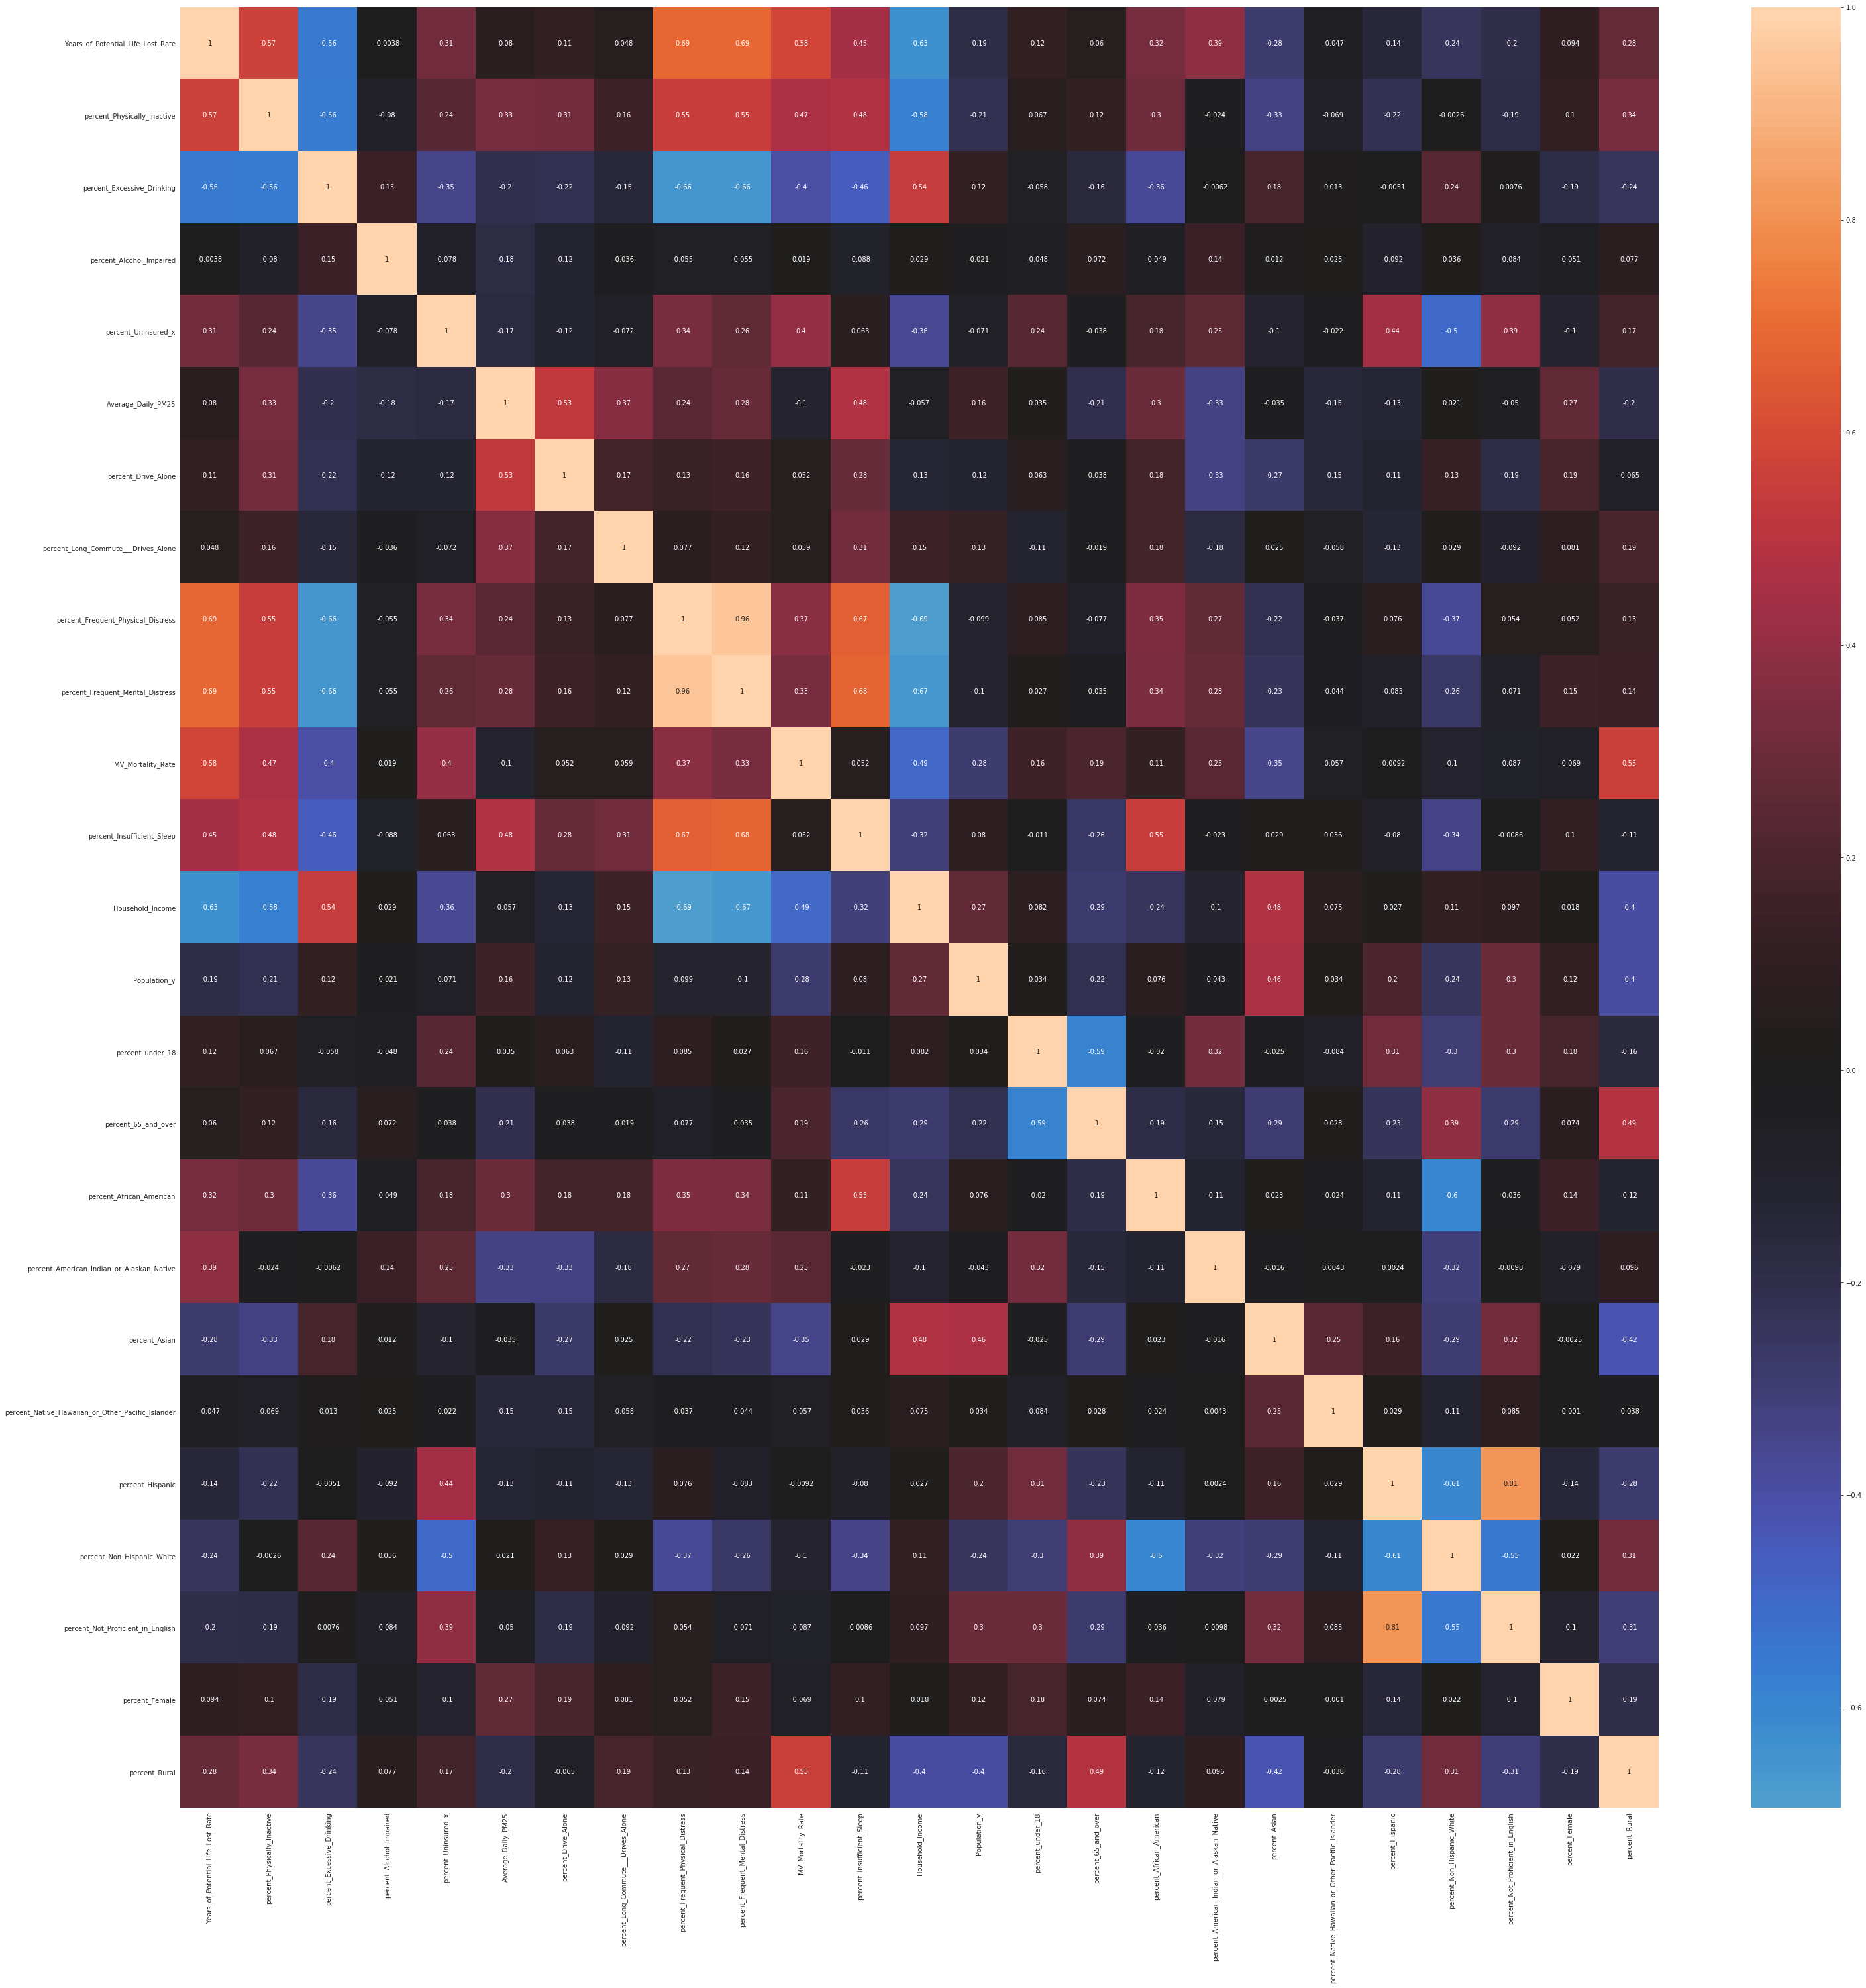

In [3]:
features = ['Years_of_Potential_Life_Lost_Rate',
         'percent_Physically_Inactive',
         'percent_Excessive_Drinking',
         'percent_Alcohol_Impaired',
         'percent_Uninsured_x',
         'Average_Daily_PM25',
         'percent_Drive_Alone',
         'percent_Long_Commute___Drives_Alone',
         'percent_Frequent_Physical_Distress',
         'percent_Frequent_Mental_Distress',
         'MV_Mortality_Rate',
         'percent_Insufficient_Sleep',
         'Household_Income',
         'Population_y',
         'percent_under_18',
         'percent_65_and_over',
         'percent_African_American',
         'percent_American_Indian_or_Alaskan_Native',
         'percent_Asian',
         'percent_Native_Hawaiian_or_Other_Pacific_Islander',
         'percent_Hispanic',
         'percent_Non_Hispanic_White',
         'percent_Not_Proficient_in_English',
         'percent_Female',
         'percent_Rural'
        ]
sns.heatmap(df[features].corr(), center=0, annot=True);

In [4]:
for col in df[features].columns:
        pct_missing = np.mean(df[col].isnull())
        print(f'{col} - {round(pct_missing*100,15)}% missing')

Years_of_Potential_Life_Lost_Rate - 0.0% missing
percent_Physically_Inactive - 0.0% missing
percent_Excessive_Drinking - 0.0% missing
percent_Alcohol_Impaired - 0.0% missing
percent_Uninsured_x - 0.0% missing
Average_Daily_PM25 - 0.0% missing
percent_Drive_Alone - 0.0% missing
percent_Long_Commute___Drives_Alone - 0.0% missing
percent_Frequent_Physical_Distress - 0.0% missing
percent_Frequent_Mental_Distress - 0.0% missing
MV_Mortality_Rate - 0.0% missing
percent_Insufficient_Sleep - 0.0% missing
Household_Income - 0.0% missing
Population_y - 0.0% missing
percent_under_18 - 0.0% missing
percent_65_and_over - 0.0% missing
percent_African_American - 0.0% missing
percent_American_Indian_or_Alaskan_Native - 0.0% missing
percent_Asian - 0.0% missing
percent_Native_Hawaiian_or_Other_Pacific_Islander - 0.0% missing
percent_Hispanic - 0.0% missing
percent_Non_Hispanic_White - 0.0% missing
percent_Not_Proficient_in_English - 0.0% missing
percent_Female - 0.0% missing
percent_Rural - 0.0% missin

## Baseline model

In [15]:
# Train/Test split (30%)
X_train, X_test, y_train, y_test = model_selection.train_test_split(df[features].drop(columns='MV_Mortality_Rate'), df['MV_Mortality_Rate'], test_size=0.30, random_state=100)

# Scaling
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# model type
model = lm.LinearRegression()

# modelling itself
model.fit(X_train_s,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

2199 943 2199 943


In [21]:
# The coefficients
print('Coefficients: \n', model.coef_)

y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Coefficients: 
 [ 3.90133982  1.67127198  0.03397733  0.17921363  0.83924551 -0.43471836
  0.65961332  0.61592976  0.8373771  -0.81340465 -2.19816513 -0.08356194
 -0.08649206  1.17819389  0.40135482  9.11587876  4.86711412  2.02701306
  1.11579376  8.8813016  12.04623849 -0.33218976 -0.58586898  2.87143335]
Train Mean Squarred Error: 1567370237.6220772
Test Mean Squarred Error: 1427320732.7536786


In [6]:
# x1 = 
# y1 = df['MV_Mortality_Rate']


# model = LogisticRegression()
# model.fit(X_train, Y_train)
# # result = model.score(X_test, Y_test)
# print("Accuracy: %.2f%%" % (result*100.0))

In [7]:
# kfold = model_selection.KFold(n_splits=10, random_state=100)
# model_kfold = LogisticRegression()
# results_kfold = model_selection.cross_val_score(model_kfold, x1, y1, cv=kfold)
# print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

### Remove uninfluencial features

In [8]:
# # Your code here - Remove features which do not appear to be statistically relevant
# # Extract the p-value table from the summary and use it to subset our features
# summary = model.summary()
# p_table = summary.tables[1]
# p_table = pd.DataFrame(p_table.data)
# p_table.columns = p_table.iloc[0]
# p_table = p_table.drop(0)
# p_table = p_table.set_index(p_table.columns[0])
# p_table['P>|t|'] = p_table['P>|t|'].astype(float)
# x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
# x_cols.remove('Intercept')
# print(len(p_table), len(x_cols))
# print(x_cols[:5])
# p_table.head()